In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import os
from io import StringIO
import json
%matplotlib inline 

In [3]:
base_name = "../fixed_experiment_data/RV23_coverage_experiment_small/"
base_paths =  [".."]
names = ["data_{0}.csv".format(str(i)) for i in range(10)]
meta_name = "meta.json"
batch_size = 10**6
header = ["$Observations$", "$State$", "$Observation$","$Execution \; Time$" ,"$Lower \; Bound$", "$Upper \; Bound$", "$Point \; Estimate$"]

In [ ]:
def slim_file(name, base_path ,increments=10**6):
    i = 0
    from_path = os.path.join(base_path,name)
    to_path = os.path.join(base_path, "slim_"+name)
    new_file = StringIO()
    with open(from_path, "r") as f:
        for line in f:
            if i % increments==0:
                print(i)
                new_file.write(line)
            i += 1
    with open(to_path, "w") as f:
        f.write(new_file.getvalue())
        
def get_meta(meta_path):
    with open(meta_path, "r") as f:
        meta_dict = json.load(f)
    return meta_dict


def generate_data_frame(base_path, name, meta_name):
    meta_dict = get_meta(base_path, meta_name)
    try:
        df =  pd.read_csv(os.path.join(base_path, "slim_"+name), names=header)
    except FileNotFoundError:
        slim_file(name, base_path)
        df =  pd.read_csv(os.path.join(base_path, "slim_"+name), names=header)
    df["$True \; Value$"] = meta_dict["true_value"]
    df = df[["$Observations$","$Lower \; Bound$", "$Upper \; Bound$",  "$True \; Value$", "$Point \; Estimate$"]]
    df2 = pd.melt(df, value_vars=["$Lower \; Bound$", "$Upper \; Bound$", "$True \; Value$", "$Point \; Estimate$"], 
              id_vars=["$Observations$"], value_name="$Property \; Value$", var_name="$Bounds$")
    return df2

    
    
def generate_all_data_frame(base_name, names, meta_name, filter_name=""):
    df_list = []
    i = 0
    for dir_name in os.listdir(base_name):
        dir_path = os.path.join(base_name, dir_path)
        for file_name in os.listdir(dir_path):
            if ".csv" in file_name:
                if n
                print("-"*100)
                print(i)
                print("-"*100)
                df = generate_data_frame(base_path, name, meta_name)
                df["$Run$"] = i
                df_list.append(df)
                i += 1
    return pd.concat(df_list)
        
        

In [68]:
def get_meta(meta_path):
    with open(meta_path, "r") as f:
        meta_dict = json.load(f)
    return meta_dict

def generate_data_frame(file_path, meta_path):
    meta_dict = get_meta(meta_path)
    df = pd.read_csv(file_path, names=header)
    df["$True \; Value$"] = meta_dict["true_value"]
    df = df[["$Observations$","$Lower \; Bound$", "$Upper \; Bound$",  "$True \; Value$", "$Point \; Estimate$"]]
    df2 = pd.melt(df, value_vars=["$Lower \; Bound$", "$Upper \; Bound$", "$True \; Value$", "$Point \; Estimate$"], 
              id_vars=["$Observations$"], value_name="$Property \; Value$", var_name="$Bounds$")
    return df2

def generate_ex_time_data_frame(file_path, meta_path):
    df = pd.read_csv(file_path, names=header)
    return df[["$Observations$", "$Execution \; Time$"]]

def generate_agg_ex_time_data_frames(base_name, generator_filter, property_filter, generator_name, property_name):
    df_list = []
    i = 0
    print(property_filter, generator_filter)
    for dir_name in os.listdir(base_name):
        dir_path = os.path.join(base_name, dir_name)
        split_dir_name = dir_name.split("_")
        if generator_filter in split_dir_name[1] and property_filter in split_dir_name[2]:
            for file_name in os.listdir(dir_path):
                if ".csv" in file_name:
                    df = generate_ex_time_data_frame(os.path.join(dir_path, file_name),os.path.join(dir_path, "meta.json"))
                    df["$Run$"] = i
                    df["$Generator$"] = generator_name
                    df["$Property$"] = property_name
                    df_list.append(df)
                    i += 1
    return pd.concat(df_list)


def generate_agg_ex_time_all_coverage_data_frames(base_name):
    df_list=[]
    gen_filter = ["e-3","known"]
    gen_name = ["$Loose$","$Tight$"]
    prop_filter = ["DP","Paa-Pbb"]
    prop_name = ["$\\varphi_{DP}$","$\\varphi_{TDP}$"]
    for i in [0,1]:
        for j in [0,1]:
            df = generate_agg_ex_time_data_frames(base_name, gen_filter[i], prop_filter[j], gen_name[i], prop_name[j])
            df_list.append(df)
    return pd.concat(df_list)


def generate_coverage_data_frames(base_name, generator_filter, property_filter, generator_name, property_name):
    df_list = []
    i = 0
    print(property_filter, generator_filter)
    for dir_name in os.listdir(base_name):
        dir_path = os.path.join(base_name, dir_name)
        split_dir_name = dir_name.split("_")
        if generator_filter in split_dir_name[1] and property_filter in split_dir_name[2]:
            for file_name in os.listdir(dir_path):
                if ".csv" in file_name:
                    df = generate_data_frame(os.path.join(dir_path, file_name),os.path.join(dir_path, "meta.json"))
                    df["$Run$"] = i
                    df["$Generator$"] = generator_name
                    df["$Property$"] = property_name
                    df_list.append(df)
                    i += 1
    return pd.concat(df_list)
    
def generate_all_coverage_data_frames(base_name):
    df_list=[]
    gen_filter = ["e-3","known"]
    gen_name = ["$Loose$","$Tight$"]
    prop_filter = ["DP","Paa-Pbb"]
    prop_name = ["$\\varphi_{DP}$","$\\varphi_{TDP}$"]
    for i in [0,1]:
        for j in [0,1]:
            df = generate_coverage_data_frames(base_name, gen_filter[i], prop_filter[j], gen_name[i], prop_name[j])
            df_list.append(df)
    return pd.concat(df_list)
            

In [5]:
df_all = generate_all_coverage_data_frames(base_name)

DP e-3
Paa-Pbb e-3
DP known
Paa-Pbb known


In [50]:
df = df_all[(df_all["$Property$"]== "$\\varphi_{TDP}$")]

In [51]:
df_min = df.groupby(["$Observations$","$Bounds$","$Generator$"]).min().reset_index()
df_min["$Max/Min$"] = "$Min$"
df_max = df.groupby(["$Observations$","$Bounds$","$Generator$"]).max().reset_index()
df_max["$Max/Min$"] = "$Max$"

df2 = pd.concat([df_min, df_max]).reset_index(drop=True)
df2 = df2[(df2["$Bounds$"]!="$True \; Value$")]
df2 = df2[ (df2["$Bounds$"]!="$Lower \; Bound$") | (df2["$Max/Min$"]!="$Min$")]
df2 = df2[ (df2["$Bounds$"]!="$Upper \; Bound$") | (df2["$Max/Min$"]!="$Max$")]
df2 = df2[ (df2["$Bounds$"]!="$Point \; Estimate$") | (df2["$Generator$"]!="$Loose$")]
df2.loc[df2["$Bounds$"]=="$Point \; Estimate$", ["$Generator$"]] = "$Observations$"

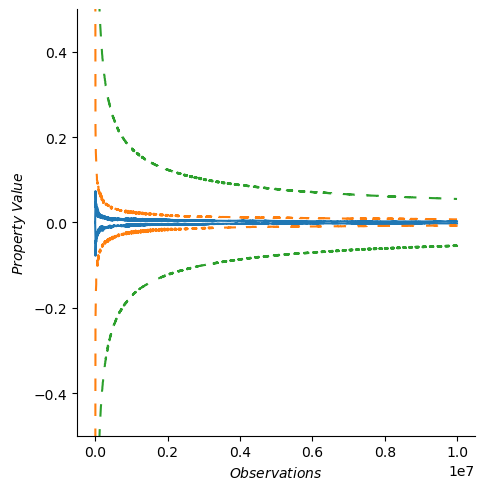

In [52]:
sns.relplot(kind="line", data=df2, x="$Observations$", y="$Property \; Value$", 
            style="$Generator$", hue=df2[["$Generator$", "$Max/Min$"]].apply(tuple, axis=1), dashes=["",(6,6),(6,6)], 
            palette=[sns.color_palette()[0], sns.color_palette()[2],sns.color_palette()[1],sns.color_palette()[2], 
                     sns.color_palette()[1],sns.color_palette()[0]],
            legend=False)
plt.ylim(-0.5,0.5)
plt.savefig("TDP_coverage.pdf", dpi=1000)

In [55]:
2**10

1024

In [ ]:
df2[df2["$Observations$"]==0]

In [69]:
df_t = generate_agg_ex_time_all_coverage_data_frames(base_name)

DP e-3
Paa-Pbb e-3
DP known
Paa-Pbb known


In [72]:
for i, df1 in df_t.groupby(["$Generator$","$Property$"]):
    print(i)
    print("mean", df1["$Execution \; Time$"].mean())
    print("median", df1["$Execution \; Time$"].median())
    print("std", df1["$Execution \; Time$"].std())
    print("max", df1["$Execution \; Time$"].max())
    print("min", df1["$Execution \; Time$"].min())
    print("--------")
    

('$Loose$', '$\\varphi_{DP}$')
mean 9.92225263709916e-05
median 0.00010058702901
std 1.3514830534732252e-05
max 0.0029315100982785
min 7.270369678735733e-05
--------
('$Loose$', '$\\varphi_{TDP}$')
mean 5.414736902260076e-05
median 4.6662986278533936e-05
std 2.371087316506717e-05
max 0.0055608029942959
min 2.8232811018824577e-05
--------
('$Tight$', '$\\varphi_{DP}$')
mean 0.00011101009353392919
median 0.0001034159213304
std 1.6284186763192648e-05
max 0.0011139558628201
min 7.366808131337166e-05
--------
('$Tight$', '$\\varphi_{TDP}$')
mean 3.539906869997022e-05
median 3.3442978747189045e-05
std 1.1422659508863794e-05
max 0.0038411640562117
min 2.5128014385700222e-05
--------
